<a href="https://colab.research.google.com/github/d-h-k/w12_tf_ws/blob/master/W12_MyTF_Day2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# OS
!cat /etc/issue.net

Ubuntu 18.04.2 LTS
Ubuntu 18.04.2 LTS


In [0]:
import tensorflow as tf
#sess = tf.In
with tf.Session() as sess:
    x =  tf.Variable([1.,2.])
    a =  tf.Constant([3.,3.])
    x.initializer.run()
    sub = tf.subtact(x,a)
    print sub.eval()


SyntaxError: ignored

In [0]:
import tensorflow as tf
state = tf.Variable(0,name='counter')
one = tf.constant(1)
new_value= tf.add(state,one)
update = tf.assign(state, new_value)
init = tf.global_variables_init

AttributeError: ignored

In [0]:
import tensorflow as tf

input1 = tf.constant([3.])
input2 = tf.constant([2.])
input3 = tf.constant([5.])
intermed = tf.add(input2, input3)
mul = tf.multiply(input1, intermed)
writer = tf.train.SummaryWriter(
  '/tmp/log', graph = tf.get_default_graph()
)

with tf.Session() as sess:
  result = sess.run([mul, intermed])
  print(result[0])
  print(result[1])
  
    

AttributeError: ignored

```
tf.summary.FileWriter 는 TensorFlow의 이전버전

tf.train.SummaryWriter로 바꿔 사용하면 됨
```
-  안되용...

In [0]:
import tensorflow as tf
input1 = tf.placeholder(tf.float32)
input2 = tf.placeholder(tf.float32)
output = tf.multiply(input1, input2)
with tf.Session() as sess:
    result = sess.run([output],{input1:[7.],
                      input2:[2.]})
    print(result)
    print("result[0] 출력 결과 :",result[0])

[array([14.], dtype=float32)]
result[0] 출력 결과 : [14.]


대부분의 멀티플라이는 실수를 사용합니다

In [0]:
!python --version

Python 3.6.8


!python --version

In [0]:
import tensorflow as tf
state1 = tf.Variable(0, name = 'state1')
state2 = tf.Variable(10, name = 'state2')
init_op = tf.global_variables_initializer()
saver = tf.train.Saver({"mys2":state2})
with tf.Session() as sess:
  saver.restore(sess,'/content/model.ckpt')
  #save_path = saver.save(sess, '/content/model.ckpt')
  print("Modle saved in file:",save_path)

ValueError: ignored

# p49 Computation Graph - 실패함, 실습예정

In [0]:
import tensorflow as tf
import numpy as np
x_data = np.random.rand(100).astype(np.float32)
y_data = x_data * 0.1 + 0.3
  
  W = tf.Variable(tf.random_uniform([1], -1, 1.))
  b = tf.Variable(tf.zeros([1]))
  y = W * x_data + b

write = tf.summary.FileWrite('/tmp/log')
  loss = tf.reduce_mean
  optimizer = tf.train.GradientDesentOptimizer(.5)
  train = optimizer.minimize(loss)

init = tf.global_variables_initializer()
sess = tf.Session()
writer = tf.summary.FileWriter('/tmp/log',
                               graph = tf.get_default_graph())

for step in range(201):
    sess.run(train)
    if step % 20 == 0:
      print(step,sess,run(W),sess.run(b))


IndentationError: ignored

In [0]:
cd ..
`

/content


In [0]:
ls -al

total 16
drwxr-xr-x 1 root root 4096 Jul 19 16:14 ./
drwxr-xr-x 1 root root 4096 Jul 30 01:47 ../
drwxr-xr-x 1 root root 4096 Jul 19 16:14 .config/
drwxr-xr-x 1 root root 4096 Jul 19 16:14 sample_data/


In [0]:
pwd

'/content'

# p57 Cost and Gradient  - 갓남우오딘우주초월존재님의 코드 

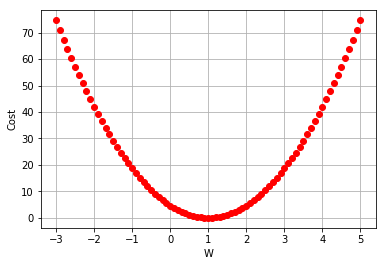

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt

X = [1., 2., 3.]
Y = [1., 2., 3.]
m = len(X)

W = tf.placeholder(tf.float32)

hypothesis = tf.multiply(W, X)
# cf. ) tf.mul(W, X) using in the old version
cost = tf.reduce_sum(tf.pow(hypothesis-Y, 2)) / m

init = tf.global_variables_initializer()
#cf.)tf.initialize_all_variables()

sess = tf.Session()
sess.run(init)

W_val, cost_val = [], []

for i in range(-30, 51) :
  xPos = i * 0.1
  yPos = sess.run(cost ,feed_dict={W: xPos})
#   print('{:3.1f}, {:3.1f}'.format(xPos, yPos))  # : 앞 형식문자. 

  W_val.append(xPos)
  cost_val.append(yPos)
sess. close()

# plt.xlim()
plt.plot(W_val, cost_val, 'ro')
plt.ylabel('Cost')
plt.xlabel('W')
plt.grid()
plt.show()

남우형한테 받아서 돌려본 복붙코드 

이제부터 진짜 공부뿐이야!!!

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt

X = [1., 2., 3.]
Y = [1., 2., 3.]
m = len(X)

W = tf.placeholder(tf.float32)

hypothesis = tf.multiply(W, X)
# cf. ) tf.mul(W, X) using in the old version
cost = tf.reduce_sum(tf.pow(hypothesis-Y, 2)) / m

init = tf.global_variables_initializer()
#cf.)tf.initialize_all_variables()

sess = tf.Session()
sess.run(init)

W_val, cost_val = [], []

for i in range(-30, 51) :
  xPos = i * 0.1
  yPos = sess.run(cost ,feed_dict={W: xPos})


print(sess.run(hypothesis, {X:5}))  
print(sess.run(hypothesis, {X:2.5}))  
print(sess.run(hypothesis, {X:2.5, 5}))  
sess. close()


# p59 Linear Regression - 선형 회귀 예제

In [0]:
import tensorflow as tf
tf.reset_default_graph()
x_data = [1., 2., 3.]
y_data = [1., 2., 3.]

with tf.name_scope("Logit_Layer"):
  W = tf.Variable(tf.random_uniform([1], -1., 1.))
  b = tf.Variable(tf.random_uniform([1], -1., 1.))
  hypothesis = W * X + b

with tf.name_scope("GD_Trainer"):
  cost = tf.reduce_mean(tf.square(hypothesis - Y))
  rate = tf.Variable(0.125)
  optimizer = tf.train.GradientDescentOptimizer(rate)
  train = optimizer.minimize(cost)
  
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
writer = tf.summary.FileWriter('/tmp/log',graph = tf.get_default_graph())

print('hypothesis : ',sess.run(hypothesis))

for step in range(2001):
  sess.run(train,{X:x_data, Y:y_data})
  #sess.run(W), sess.run(b)
  
  
print(sess.run(hypothesis, feed_dict = {X:5}))  
print(sess.run(hypothesis, feed_dict = {X:2.5}))  
#print(sess.run(hypothesis, {X:2.5, 5}))  
  
if step % 20 == 0:
  print(step, sess.run(cost), sess.run(W), sess.run(b))
sess.close()

hypothesis :  [0.7132311  0.86175346 1.0102758 ]


TypeError: ignored

# p60--미완성

In [0]:
import tensorflow as tf

x_data = [1., 2., 3., 4.]
y_data = [2., 4., 6., 8.]

# range is -100 ~ 100
W = tf.Variable(tf.random_uniform ([1], -100., 100.))
b = tf.Variable(tf.random_uniform([1], -100., 100.))

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

hypothesis = W * X + b
cost = tf.reduce_mean(tf.square(hypothesis - Y))
rate = tf.Variable(0.1)
optimizer = tf.train.GradientDescentOptimizer(rate)
train = optimizer.minimize (cost )

init = tf.global_variables_initializer()
#cf.)tf.initialize_all_variables() using in the old version

sess = tf.Session()
sess.run(init)

for step in range(2001):
  sess.run(train, feed_dict={X: x_data, Y: y_data})
  if step% 20 == 0:
    print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run(W), sess.run(b))
    

print(sess.run(hypothesis, feed_dict={X : 5}))
print(sess.run(hypothesis, feed_dict={X : 2.5}))
print(sess.run(hypothesis, feed_dict={X: [2.5, 5]}))

0 20841.797 [65.35371] [-32.58808]
20 116.57625 [11.001488] [-26.414316]
40 34.559135 [6.8926296] [-14.38491]
60 10.245288 [4.663928] [-7.8322735]
80 3.037284 [3.4504511] [-4.264503]
100 0.900423 [2.789739] [-2.3219295]
120 0.2669364 [2.4299963] [-1.2642403]
140 0.079135105 [2.2341235] [-0.6883516]
160 0.023460167 [2.1274753] [-0.37479258]
180 0.00695492 [2.0694072] [-0.20406649]
200 0.0020618306 [2.037791] [-0.11110974]
220 0.000611239 [2.0205762] [-0.06049687]
240 0.00018120851 [2.011203] [-0.03293929]
260 5.372027e-05 [2.0061002] [-0.0179347]
280 1.5926265e-05 [2.0033212] [-0.00976507]
300 4.721306e-06 [2.0018084] [-0.00531685]
320 1.3994986e-06 [2.0009847] [-0.00289497]
340 4.1486834e-07 [2.0005362] [-0.00157621]
360 1.2301663e-07 [2.000292] [-0.00085821]
380 3.648174e-08 [2.0001588] [-0.00046738]
400 1.07967395e-08 [2.0000865] [-0.00025442]
420 3.2069813e-09 [2.0000472] [-0.00013846]
440 9.470824e-10 [2.0000255] [-7.5358024e-05]
460 2.803091e-10 [2.0000136] [-4.1049603e-05]
480 8.

In [0]:
from google.colab import files
uploaded = files.upload()

# 딥러닝 따라가기 유틸리티
구글의 뭔가를 올린다는거같은데..?
## 김태영님의 코랩 사용법
```
https://tykimos.github.io/2019/01/22/colab_getting_started/
```

## 갓남우님의 코랩 
```
https://colab.research.google.com/drive/1Sh8oyIhVgYIbXY2NhYv8k14WtfnrtKGj#scrollTo=2DCXK4pKcGMX
```

## 콤퓨터의 신이시여 저에게 힘을 !! ㅠㅠㅠ
```
아직 뭐가 뭔지 모르겠다..
```

# Page60

In [0]:
import tensorflow as tf

x_data = [1., 2., 3., 4.]
y_data = [2., 4., 6., 8.]

# range is -100 ~ 100
W = tf.Variable(tf.random_uniform ([1], -100., 100.))
b = tf.Variable(tf.random_uniform([1], -100., 100.))

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

hypothesis = W * X + b
cost = tf.reduce_mean(tf.square(hypothesis - Y))
rate = tf.Variable(0.1)
optimizer = tf.train.GradientDescentOptimizer(rate)
train = optimizer.minimize (cost )
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for step in range(2001):
  sess.run(train, feed_dict = {X=})
  if step% 20 == 0:
    print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run(W), sess.run(b))
    

print(sess.run(hypothesis, feed_dict={X : 5}))
print(sess.run(hypothesis, feed_dict={X : 2.5}))
print(sess.run(hypothesis, feed_dict={X: [2.5, 5]}))

0 3294.1348 [-1.4740793] [65.94817]
20 179.25009 [-9.137027] [32.76277]
40 53.139797 [-4.0669475] [17.837572]
60 15.75365 [-1.3033229] [9.712172]
80 4.670277 [0.201412] [5.2880683]
100 1.384535 [1.0207077] [2.8792388]
120 0.4104547 [1.4667965] [1.5676833]
140 0.12168198 [1.7096822] [0.85356975]
160 0.03607346 [1.8419282] [0.46475038]
180 0.010694238 [1.9139334] [0.25304654]
200 0.0031703701 [1.9531386] [0.13777836]
220 0.0009398747 [1.974485] [0.07501737]
240 0.00027863443 [1.9861076] [0.04084532]
260 8.2603154e-05 [1.9924359] [0.02223939]
280 2.448783e-05 [1.9958816] [0.01210887]
300 7.259577e-06 [1.9977576] [0.006593]
320 2.1522774e-06 [1.9987792] [0.0035897]
340 6.3801986e-07 [1.9993353] [0.00195454]
360 1.8910477e-07 [1.999638] [0.00106416]
380 5.6064223e-08 [1.9998028] [0.00057944]
400 1.661472e-08 [1.9998927] [0.00031553]
420 4.9358846e-09 [1.9999416] [0.00017185]
440 1.466347e-09 [1.9999682] [9.358658e-05]
460 4.3054627e-10 [1.9999827] [5.0993098e-05]
480 1.2990142e-10 [1.999990

## p60 이어서 - 왜안되징

In [0]:
import tensorflow as tf

x_data = [1., 2., 3., 4.]
y_data = [2., 4., 6., 8.]
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

with tf.name_scope("Logit_layer"):
  # range is -100 ~ 100
  W2 = tf.Variable(tf.random_uniform ([1], -100., 100.))
  #b = tf.Variable(tf.random_uniform([1], -100., 100.))
  #X = tf.placeholder(tf.float32)
  #Y = tf.placeholder(tf.float32)
  hypothesis = W2 * X # + b
  
with tf.name_scope("GD_Trainer"):
  cost = tf.reduce_mean(tf.square(hypothesis - Y))
  rate = tf.Variable(0.1)
  gradient = tf.reduce_mean((W2 * X -Y) * X)
  desent = W2 - rate *gradient
  update = tf.assign(W2,desent)
  #optimizer = tf.train.GradientDescentOptimizer(rate)
  #train = optimizer.minimize (cost )
  
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
writer = tf.summary.FileWriter('/content/log', graph = tf.get_default_graph())


#여기서부터 train
for step in range(2001):
  sess.run(train, feed_dict = {X:x_data, Y:y_data})
  if step% 20 == 0:
    print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run(W), sess.run(b))
    

print(sess.run(hypothesis, feed_dict={X : 5}))
print(sess.run(hypothesis, feed_dict={X : 2.5}))
print(sess.run(hypothesis, feed_dict={X: [2.5, 5]}))

InvalidArgumentError: ignored

## 나는 왜 안되는걸까 ㅜㅠㅜ//이거슨 갓남우님의 코

In [0]:
import tensorflow as tf

x_data = [1., 2., 3., 4.]
y_data = [2., 4., 6., 8.]
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
# W2 = tf.placeholder(tf.float32)


with tf.name_scope("Logit_Layer"):
# range is -100 ~ 100
#   W = tf.Variable(tf.random_uniform ([1], -100., 100.))
  W2 = tf.Variable(tf.random_uniform ([1], -100., 100.))
  #b = tf.Variable(tf.random_uniform([1], -100., 100.))
  hypothesis = W2 * X # + b
  
with tf.name_scope("GD_Trainer"):
  cost = tf.reduce_mean(tf.square(hypothesis - Y))  #cost
  rate = tf.Variable(0.1)
  gradient = tf.reduce_mean((W2 * X - Y) * X)    #gradient 실습하기 위해 추가
  descent = W2 - rate * gradient   #alpha 는 Learning rate~  # descent 
  update = tf.assign(W2, descent)
#   optimizer = tf.train.GradientDescentOptimizer(rate)
#   train = optimizer.minimize(cost)

init = tf.global_variables_initializer()
#cf.)tf.initialize_all_variables() using in the old version

sess = tf.Session()
sess.run(init)
writer = tf.summary.FileWriter('/content/log',graph=tf.get_default_graph())

#여기서부터 train
for step in range(200):
#   sess.run(train, feed_dict={X: x_data, Y: y_data})
  if step% 5 == 0:
    print('step:', step, sess.run(update, feed_dict={X: x_data, Y: y_data}),'W2:',sess.run(W2))

#여기서부터 test
#관측되지 않은 데이터 넣어보기 5, 2.5
print(sess.run(hypothesis, feed_dict={X : 5}))    
print(sess.run(hypothesis, feed_dict={X : 2.5}))
print(sess.run(hypothesis, feed_dict={X: [2.5, 5]}))

step: 0 [-15.356609] W2: [-15.356609]
step: 5 [-2.3391514] W2: [-2.3391514]
step: 10 [0.9152119] W2: [0.9152119]
step: 15 [1.728803] W2: [1.728803]
step: 20 [1.9322008] W2: [1.9322008]
step: 25 [1.9830502] W2: [1.9830502]
step: 30 [1.9957626] W2: [1.9957626]
step: 35 [1.9989407] W2: [1.9989407]
step: 40 [1.9997351] W2: [1.9997351]
step: 45 [1.9999337] W2: [1.9999337]
step: 50 [1.9999834] W2: [1.9999834]
step: 55 [1.9999958] W2: [1.9999958]
step: 60 [1.9999989] W2: [1.9999989]
step: 65 [1.9999998] W2: [1.9999998]
step: 70 [2.] W2: [2.]
step: 75 [2.] W2: [2.]
step: 80 [2.] W2: [2.]
step: 85 [2.] W2: [2.]
step: 90 [2.] W2: [2.]
step: 95 [2.] W2: [2.]
step: 100 [2.] W2: [2.]
step: 105 [2.] W2: [2.]
step: 110 [2.] W2: [2.]
step: 115 [2.] W2: [2.]
step: 120 [2.] W2: [2.]
step: 125 [2.] W2: [2.]
step: 130 [2.] W2: [2.]
step: 135 [2.] W2: [2.]
step: 140 [2.] W2: [2.]
step: 145 [2.] W2: [2.]
step: 150 [2.] W2: [2.]
step: 155 [2.] W2: [2.]
step: 160 [2.] W2: [2.]
step: 165 [2.] W2: [2.]
step: 17

# p62 Logistic Regression

In [0]:
import tensorflow as tf
import numpy as np

xy = np.loadtxt('train.txt', unpack=True, dtype = 'float32')
x_data = xy[:-1]
y_data = xy[-1]

x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)
z = tf.Variable(tf.random_uniform([1, len(x_data)], -1.0, -1.0))

h = tf.matmul(W,X)
hypothesis = -tf.div( 1., 1. + tf.exp(-h) )


OSError: ignored